In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
pd.Categorical(df)

['id', 'gender', 'age', 'hypertension', 'heart_disease', ..., 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']
Length: 12
Categories (12, object): ['Residence_type', 'age', 'avg_glucose_level', 'bmi', ..., 'id', 'smoking_status', 'stroke', 'work_type']

In [5]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [6]:
df.age.isnull().sum()

0

In [7]:
df.describe(include="object")

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [8]:
df.shape

(5110, 12)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
import warnings
warnings.filterwarnings("ignore")

df.age[df.age<=20] = 0
df.age[(df.age<=40) & (df.age>20)] = 1
df.age[(df.age<=60) & (df.age>40)] = 2
df.age[df.age>60] = 3

In [11]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,3.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,3.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,3.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,2.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,3.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [12]:
 df.age.values

array([3., 3., 3., ..., 1., 2., 2.])

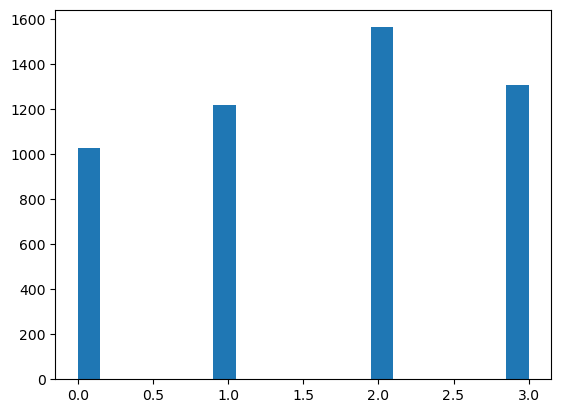

In [13]:
plt.hist(df["age"],bins=20)
plt.show()

In [14]:
categorical_features = df.select_dtypes(include='object').columns.to_list()
numerical_features = df.select_dtypes(include='number').columns.to_list()

In [15]:
categorical_features

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [16]:
numerical_features

['id',
 'age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'stroke']

In [17]:
numerical_features.remove('id')

In [18]:
numerical_features

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

In [19]:
def categorical_analysis(dataframe:pd.DataFrame(),cat_features:list,
                         rows:int,columns:int,fig_width: int = 20, fig_height: int = 10):
    
    plt.figure(figsize=(fig_width,fig_height))
    for i,col in enumerate(cat_features):
        plt.subplot(rows,columns,i+1)
        sns.countplot(data=dataframe,x=col)
        plt.title("{} Distribution".format(col))
    plt.show()

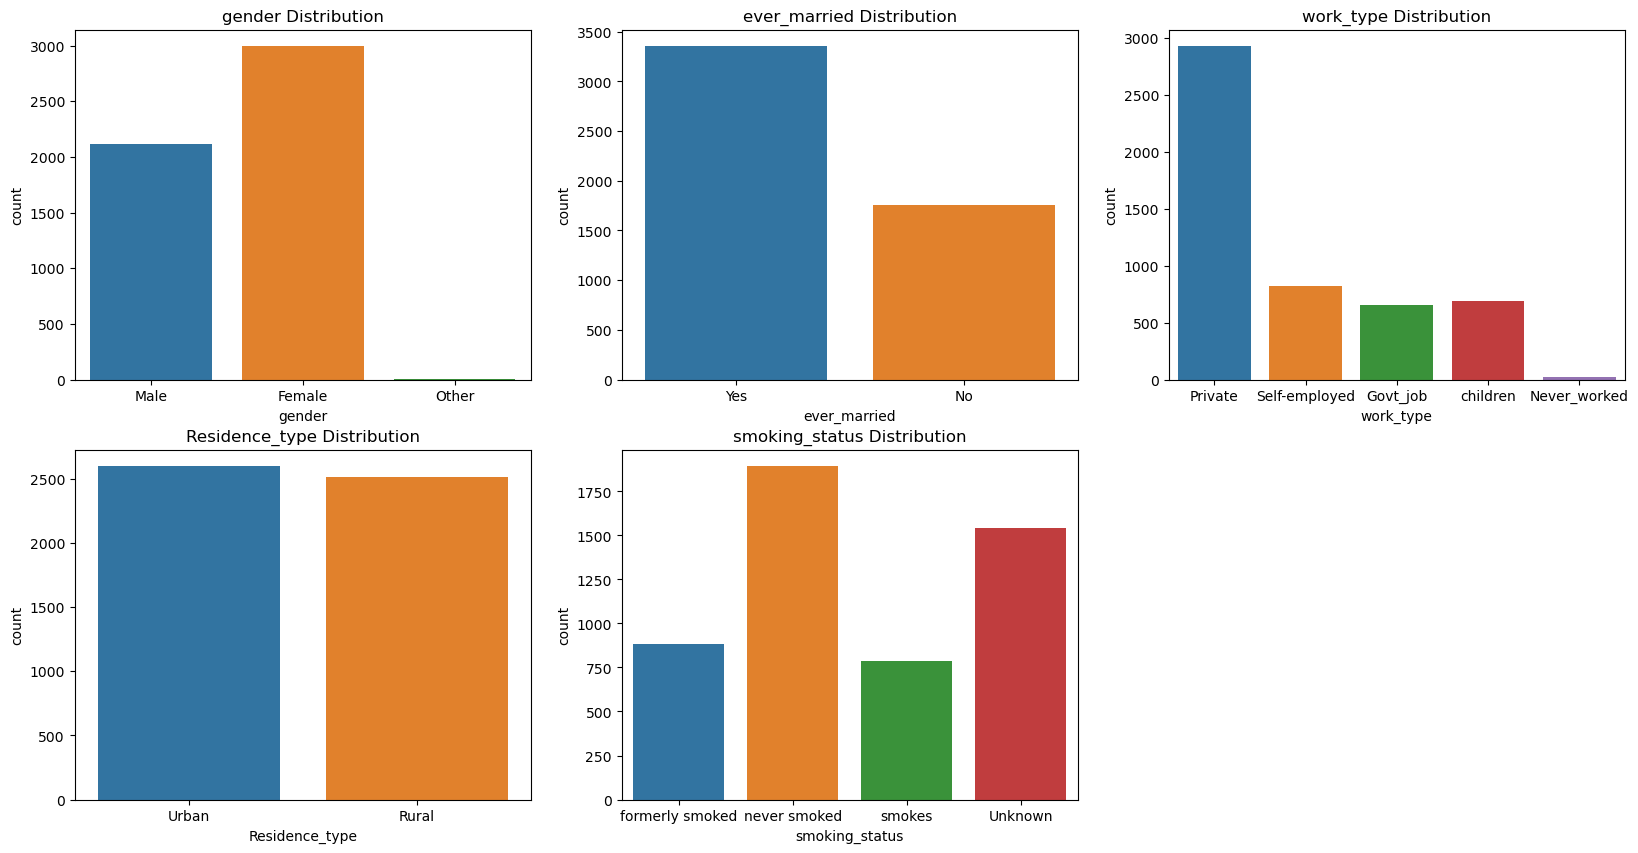

In [20]:
categorical_analysis(df,categorical_features,2,3)

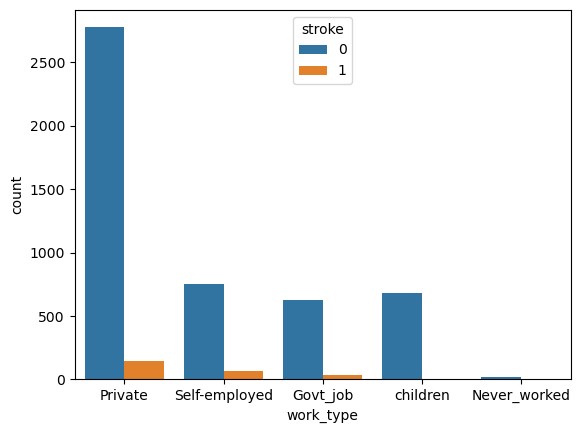

In [21]:
sns.countplot(data=df,x="work_type",hue="stroke")
plt.show()

In [22]:
def numerical_analysis(dataframe:pd.DataFrame(),num_features:list,
                         rows:int,columns:int,fig_width: int = 20, fig_height: int = 10):
    
    plt.figure(figsize=(fig_width,fig_height))
    for i,col in enumerate(num_features):
        plt.subplot(rows,columns,i+1)
        sns.kdeplot(data=dataframe,x=col)
        plt.title("{} Distribution".format(col))
    plt.show()

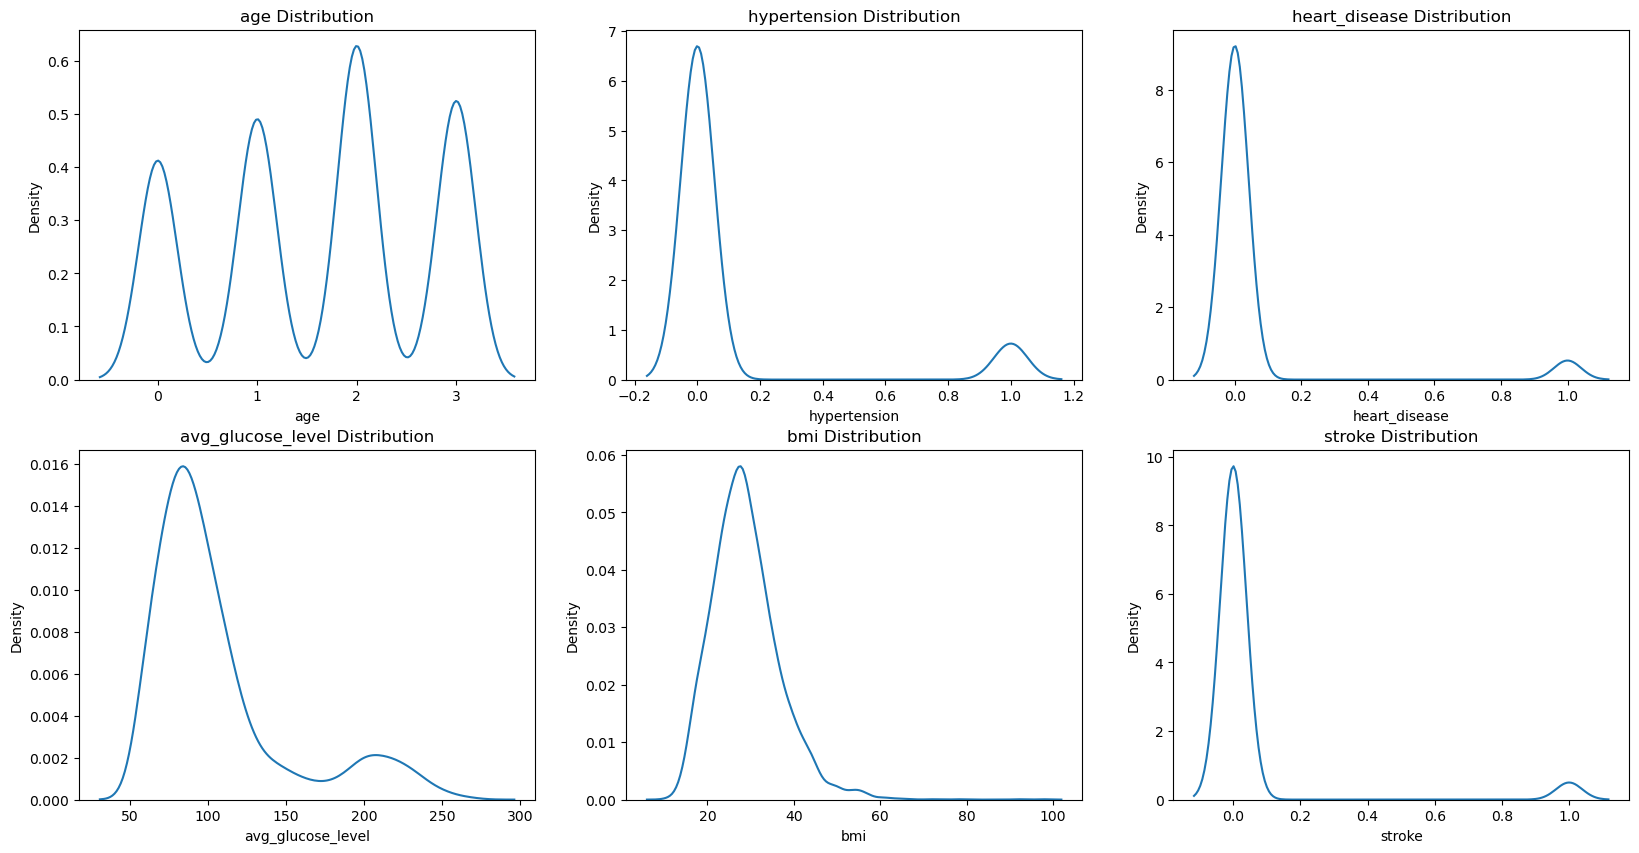

In [23]:
numerical_analysis(df,numerical_features,2,3)

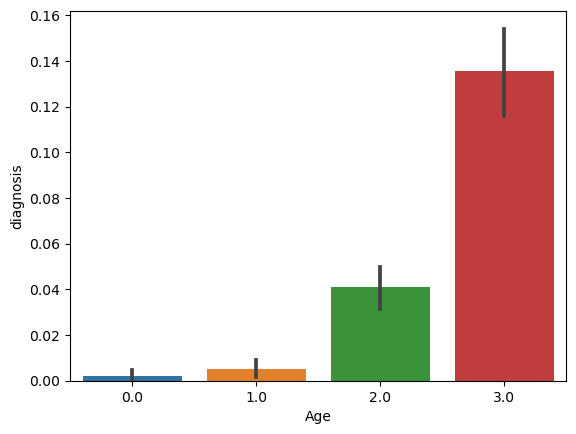

In [25]:
sns.barplot(data=df,x="age",y="stroke")
plt.xlabel("Age")
plt.ylabel("diagnosis")
plt.show()

In [27]:
df[["gender","stroke"]].groupby(["gender"],as_index=False).sum().sort_values(by="stroke",ascending=False)

,gender,stroke
0,Female,141
1,Male,108
2,Other,0


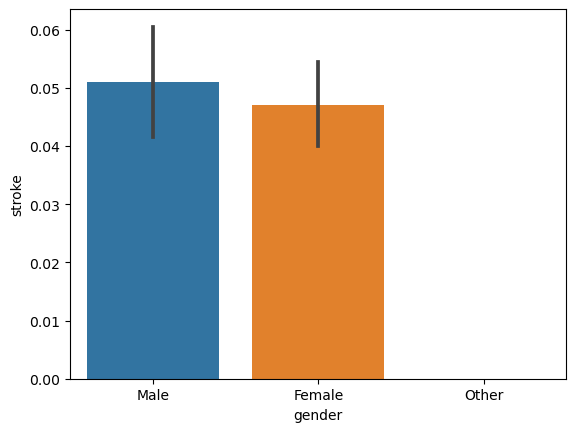

In [28]:
sns.barplot(data=df,x="gender",y="stroke")
plt.xlabel("gender")
plt.ylabel("stroke")
plt.show()